In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)

# Import data 

In [2]:
auh = pd.read_csv("carswitchadudhabi.csv")
dxb = pd.read_csv("carswitchdubai.csv")
shj = pd.read_csv("carswitchsharjah.csv")

# Concatenate all datasets and drop useless columns

In [2]:
# df = pd.concat([auh, dxb, shj]).drop(["web-scraper-order", "web-scraper-start-url","car-href", "car", "location",
#                                      "basic-features"],
#                                        axis=1)
df = pd.read_csv("car_switch_data.csv")

In [3]:
df = df.dropna(how="all")


In [8]:
df

,brand-name,sub-brand,milage,price,body-inc,engine-transmission,road-test,tire-brakes,overall-inc,Specs,console-features,electronics
0,2015 Audi,A4,"125,000 KM","AED 40,000",3.8,4.5,5.0,4.3,4.2/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Normal roof""},{""console-...",5.0
1,2008 Mercedes,C230,"193,000 KM","AED 23,000",3.7,5.0,5.0,3.8,4.2/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Panoramic Roof""},{""conso...",5.0
2,2013 Volkswagen,Passat 2.5L,"145,000 KM","AED 22,000",3.3,4.1,5.0,4.8,4.0/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Normal roof""}]",4.5
3,2014 Infiniti,QX70,"111,900 KM","AED 63,000",3.9,4.5,5.0,3.0,4.0/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Sunroof""},{""console-feat...",NaN
4,2015 Mercedes,S500,"47,000 KM","AED 275,500",NaN,NaN,5.0,4.0,4.6/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Panoramic Roof""},{""conso...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2017 Honda,City 1.5L,"33,000 KM","AED 40,000",5.0,5.0,5.0,5.0,5.0/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Normal roof""},{""console-...",5.0
1732,2008 Infiniti,FX35,"143,000 KM","AED 19,500",1.9,2.9,4.2,4.3,3.2/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Sunroof""},{""console-feat...",3.2
1733,2014 Suzuki,Swift 1.2L,"42,000 KM","AED 21,000",3.0,5.0,5.0,5.0,4.2/5,"[{""Specs"":""Specs:""},{""Specs"":""GCC""},{""Specs"":""...","[{""console-features"":""Normal roof""}]",5.0
1734,2009 Chevrolet,Traverse 3.6L V6,"119,000 Miles","AED 13,000",3.9,3.3,5.0,4.8,3.8/5,"[{""Specs"":""Specs:""},{""Specs"":""American""},{""Spe...","[{""console-features"":""Sun and moonroof""},{""con...",3.6


# Extracting Year, Brand, Milage, Price and Over-all incpection score

In [57]:
brands = []
years = []
milages = []
prices = []
incpections = []
for brand_name, milage,price, incpection  in zip(df["brand-name"], df["milage"], df["price"], df["overall-inc"]):
    years.append(float(brand_name.split()[0]))
    brands.append(str(brand_name.split()[1]))
    milages.append(float(milage.split()[0].replace(",", "")))
    prices.append(float(price.split()[1].replace(",", "")))
    incpections.append(float(incpection.split("/")[0]))
   
    

# Checkpoint1

In [58]:
df1 = df.copy()

In [59]:
df1 = df1.drop(["brand-name"], axis=1)
df1["brand"] = brands
df1["year"] = years
df1["milage"] = milages
df1["price"] = prices
df1["overall-inc"] = incpections

In [60]:
temp_df = df1.groupby("brand").count()["price"]
brands_to_drop = temp_df.where(temp_df < 10).dropna()
brands_to_drop = list(brands_to_drop.index)
#drop brands with number of records less than 10
df1 = df1[~df1["brand"].isin(brands_to_drop)]
df1.to_csv("version2.csv")

In [9]:
df1

NameError: name 'df1' is not defined

# Extracting Cars Specifications from Specs column

In [61]:
#Each entry in Specs column is a string in the form of a list of dictionaries.
#ast module is used to parse this tring into a list of strings in the form of dictionaries, and used again to parse
#these strings into python dictionaries

import ast
list_of_parsed_specs = {"Specs":[], "Color":[], 'Number Of Cylinders':[]}

specs = pd.read_csv("version2.csv")["Specs"]

for spec in specs:
    spec = ast.literal_eval(str(spec))
    
    specs_dicts = []
    for dictionary in spec:
        specs_dicts.append(ast.literal_eval(str(dictionary)))

    spec_list = []
    for dic in specs_dicts:
        for key,value in dic.items():
            spec_list.append(value)
    spec_dict = {}
    for i, e in enumerate(spec_list):
        if i%2 == 0:
            spec_dict[e[:-1]] = spec_list[i+1]

    list_of_parsed_specs["Specs"].append(spec_dict["Specs"])
    try:
        list_of_parsed_specs["Color"].append(spec_dict["Color"])
    except:
        list_of_parsed_specs["Color"].append(np.nan)
        
        
    try:
        list_of_parsed_specs["Number Of Cylinders"].append(spec_dict["Number Of Cylinders"])
    except:
        list_of_parsed_specs["Number Of Cylinders"].append(np.nan)
        


# Updating dataset


Dropping all incpection scores but over-all incpection, adding extracted features columns and rearranging columns

In [62]:
df3 = df1.copy()
df3["Specs"] = list_of_parsed_specs["Specs"]
df3["no. of cylinders"] = list_of_parsed_specs["Number Of Cylinders"]
df3["Color"] = list_of_parsed_specs["Color"]
df3 = df3[['brand', 'sub-brand', 'Color', 'year', 'milage', 'Specs', 'no. of cylinders', 'overall-inc',  'price']]

In [46]:
df3

,brand,sub-brand,Color,year,milage,Specs,no. of cylinders,overall-inc,price
0,Audi,A4,White,2015.0,125000.0,GCC,4,4.2,40000.0
1,Mercedes,C230,Silver,2008.0,193000.0,GCC,4,4.2,23000.0
2,Volkswagen,Passat 2.5L,White,2013.0,145000.0,GCC,5,4.0,22000.0
3,Infiniti,QX70,White,2014.0,111900.0,GCC,6,4.0,63000.0
4,Mercedes,S500,White,2015.0,47000.0,GCC,8,4.6,275500.0
5,Volvo,S90 T5,Blue,2017.0,16700.0,GCC,4,4.9,108000.0
6,Chevrolet,Tahoe,White,2010.0,190000.0,GCC,8,4.6,42000.0
7,Porsche,Cayenne,Gold,2009.0,92000.0,GCC,6,3.9,41000.0
8,BMW,X5 50i,Brown,2014.0,81000.0,GCC,8,4.6,122000.0
9,Nissan,Altima 2.5L,Grey,2015.0,48500.0,GCC,4,3.9,42500.0


# Creating a weight for each brand using jenks_natural_breaks algorithm

In [63]:
import jenkspy
avg_prices = df3.groupby(["brand"]).mean()["price"]
prices_df = pd.DataFrame(data={"avg_prices":avg_prices})
prices_df = prices_df.sort_values("avg_prices")

In [64]:
avg_prices.sort_values()

brand
Peugeot        17815.384615
Renault        25592.391304
Kia            39322.681818
Mazda          42323.333333
Hyundai        42333.300000
Mitsubishi     43312.500000
Volkswagen     44928.169014
Honda          47676.898734
Chevrolet      48823.148148
Volvo          50346.153846
Ford           55152.968750
Dodge          56359.731707
Nissan         58730.763441
Lincoln        59372.727273
GMC            64395.588235
Land           65436.318182
Toyota         66169.165049
MINI           66398.809524
Audi           66676.495726
Jaguar         69891.666667
Infiniti       78066.666667
Jeep           81523.566038
Cadillac       85120.153846
Bmw            88325.000000
Lexus          93226.923077
BMW            95149.991667
Mercedes      101961.340206
Range         126965.886364
Porsche       131137.475000
Maserati      140352.941176
Name: price, dtype: float64

In [65]:
breaks = jenkspy.jenks_breaks(avg_prices, nb_class=28)

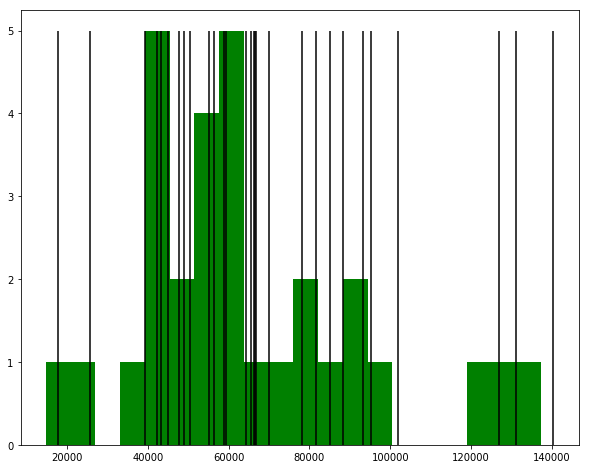

In [66]:
#Plot of avg prices and breaks
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
hist = plt.hist(prices_df["avg_prices"], bins=20, align='left', color='g')
for b in breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

In [67]:
import bisect
mapping_dict = {}
for brand, i in zip(prices_df.index, prices_df["avg_prices"]):
    mapping_dict[brand] = bisect.bisect_left(breaks, i)+1
    
df3["brand_weight"] = df3["brand"].map(mapping_dict)
mapping_dict

{'Peugeot': 1,
 'Renault': 2,
 'Kia': 3,
 'Mazda': 4,
 'Hyundai': 4,
 'Mitsubishi': 5,
 'Volkswagen': 6,
 'Honda': 7,
 'Chevrolet': 8,
 'Volvo': 9,
 'Ford': 10,
 'Dodge': 11,
 'Nissan': 12,
 'Lincoln': 13,
 'GMC': 14,
 'Land': 15,
 'Toyota': 16,
 'MINI': 17,
 'Audi': 18,
 'Jaguar': 19,
 'Infiniti': 20,
 'Jeep': 21,
 'Cadillac': 22,
 'Bmw': 23,
 'Lexus': 24,
 'BMW': 25,
 'Mercedes': 26,
 'Range': 27,
 'Porsche': 28,
 'Maserati': 29}

# Creating weights for sub brands

In [68]:
#Start by creating a dataframe for each brand

brands_df = {}

for brand in df3["brand"]:
    brands_df[brand], _ = [x for _, x in df3.groupby(df3['brand'] != brand)]

In [72]:
#Creating weights
#Go over each dataframe in brands_df and use groupby to find average prices of sub_brands, and the apply JNB alogrithm(used above)
mapping_dict = {}

for brand, dataframe in brands_df.items():
    sub_brand_averages = pd.DataFrame(data={"sub_brand_averages":dataframe.groupby(["sub-brand"]).mean()["price"]})
    sub_brand_breaks = jenkspy.jenks_breaks(sub_brand_averages["sub_brand_averages"], nb_class=int(len(sub_brand_averages)-1))
#     sub_brand_averages["weights"] = [bisect.bisect_left(sub_brand_breaks, i) for i in sub_brand_averages["sub_brand_averages"]]
#     sub_brand_weights[brand] = sub_brand_averages
    for i, weight in zip(sub_brand_averages.index, sub_brand_averages["sub_brand_averages"]):
        mapping_dict[i] = bisect.bisect_left(sub_brand_breaks, weight)+1
    df3["sub_brand_weight"] = df3["sub-brand"].map(mapping_dict)

In [73]:
df3.sub_brand_weight

0        9
1        2
2       10
3       18
4       53
5       10
6       22
7        2
8       18
9       27
11       1
12      29
13      18
14      50
15      24
16      22
17      38
19      37
20      36
21      26
22      40
23      15
24      76
25       3
26       1
27      42
28      81
29       7
30      10
31      26
32      17
33      59
34      16
35       1
36      14
37      48
38      48
39      35
41      48
42      10
43      17
44       8
45      53
46      25
47      30
48      10
49       1
50      61
51      43
52      63
53      17
54       5
55       4
56      15
57       3
58      27
59      14
60      28
61      57
62      22
63      17
64      15
65       8
66      24
67      20
68      48
69      58
70       2
71      17
72      36
73      11
74      16
75      20
76      10
77      31
78       3
79      17
80      77
81      19
82      17
83      18
84      15
85       3
86      69
87      35
88      12
89      25
90      12
91      18
92      25
93      14

# Checkpoint

In [89]:
df4 = df3.copy()

In [90]:
df4 = df4.drop(1095).dropna()
df4 = df4.drop(1728).dropna()

In [91]:
df4["no. of cylinders"] = df4["no. of cylinders"].astype(float)

In [ ]:
df4

In [92]:
df4.to_csv("preprocessedCarSwitch.csv", index=False)

In [88]:
df4["no. of cylinders"]

0           4
1           4
2           5
3           6
4           8
5           4
6           8
7           6
8           8
9           4
11          6
12          4
13          6
14          6
15          6
16          4
17          4
19          8
20          4
21          6
22          4
23          6
24          8
25          6
26          4
27          6
28          6
29          4
30          4
31          8
32          4
33          8
34          6
35          6
36          8
37          4
38          6
39          6
41          6
42          4
43          4
44          4
45          6
46          4
47          6
48          4
49          4
50          8
51          4
52          6
53          6
54          8
55          6
56          6
57          6
58          6
59          4
60          4
61          4
62          5
63          4
64          8
65          4
66          6
67          4
68          8
69          8
70          4
71          6
72          6
73          4
74    